# 전체 데이터 작업 

In [1]:
pd.options.display.float_format = '{:.5f}'.format

In [2]:
# # 피클 저장하기 

# with open('jeju_all.pickle','wb') as fw:
#     pickle.dump(jeju_all, fw)

In [25]:
# 피클 불러오기 
import pickle
with open('jeju_all.pickle','rb') as fr:
    jeju_all = pickle.load(fr)

jeju_all.tail(3)

,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,lon,lat,lon_lat,dong,Category
280082,278935,278935,202008,제주특별자치도,서귀포시,영세,예체능학원,x시,110000,0,1,0,921003.98200,1476177.84050,126.65174159048293,33.27407883370635,126.65174159048293_33.27407883370635,남원읍,교육/육아
280083,279538,279538,202008,제주특별자치도,서귀포시,영세,기타가구,x시,50000,0,1,0,937500.16740,1486052.75280,126.82818252032293,33.36422597166203,126.82818252032293_33.36422597166203,성산읍,생활/기타
280084,279785,279785,202008,제주특별자치도,제주시,영세,기타숙박업,x시,17470,0,2,0,941114.05310,1503713.22230,126.86586853032782,33.52371304945294,126.86586853032782_33.52371304945294,구좌읍,여행/숙박


# 1. 제주도 소비 전반적 분석  

In [26]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
f_path= "C:/Windows/Fonts/malgun.ttf"
font_name= font_manager.FontProperties(fname=f_path).get_name()
rc('font', family =font_name)
plt.rc('font', family='Malgun Gothic')
from matplotlib import rc
import seaborn as sns 

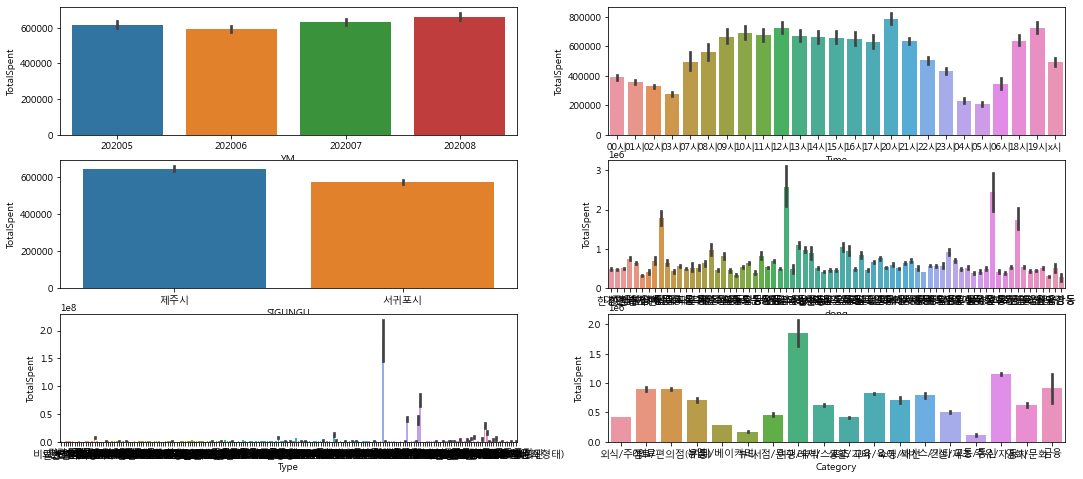

In [5]:
# 총사용금액로 각 컬럼별 데이터 스키밍 

figure, ((ax1,ax2), (ax3,ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(18,8)

sns.barplot(data=jeju_all, x="YM", y="TotalSpent", ax=ax1)  #월별 총사용금액 
sns.barplot(data=jeju_all, x="Time", y="TotalSpent", ax=ax2)  #시간대별 총 사용금액 
sns.barplot(data=jeju_all, x="SIGUNGU", y="TotalSpent", ax=ax3) #제주/서귀포 총 사용금액
sns.barplot(data=jeju_all, x="dong", y="TotalSpent", ax=ax4) # 읍면동별 총 사용금액 
sns.barplot(data=jeju_all, x="Type", y="TotalSpent", ax=ax5) # 업종별 사용금액 
sns.barplot(data=jeju_all, x="Category", y="TotalSpent", ax=ax6) # 업종구분별 사용금액 

# 2. 재난지원금 분석 - 포인트 (기간별)

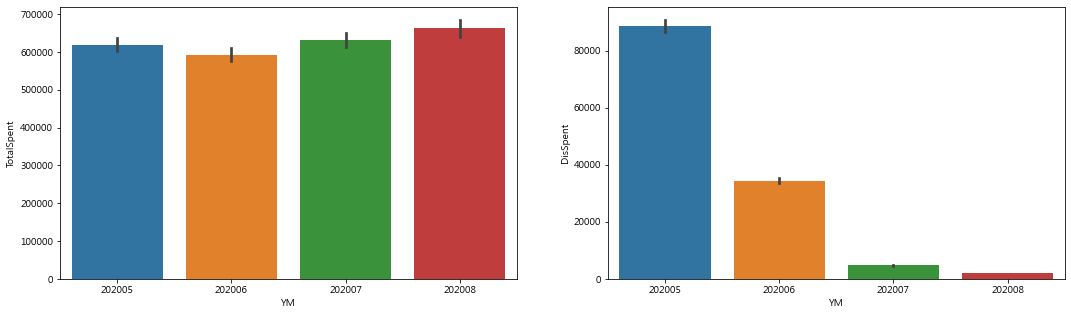

In [6]:
# 월별 총 사용금액 / 월별 재난지원금 총 사용금액 

figure, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,5)


sns.barplot(data=jeju_all, x="YM", y="TotalSpent", ax=ax1)
sns.barplot(data=jeju_all, x="YM", y="DisSpent", ax=ax2)

#### 대부분의 재난지원금은 5월에 사용되었음을 알 수 있음 

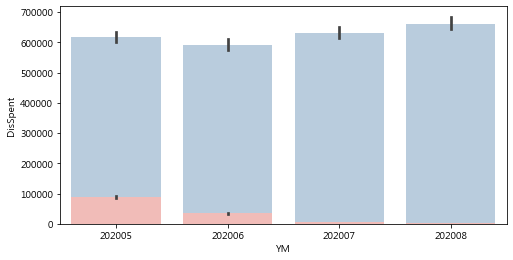

In [7]:
# 월별 총사용금액 - 총사용금액 대비 재난지원금 확인 

f, ax = plt.subplots(figsize=(8,4))
sns.barplot(x='YM', y ='TotalSpent', data=jeju_all, color='#b3cde3')
sns.barplot(x='YM', y ='DisSpent', data=jeju_all, color='#fbb4ae')

#### 5월 총 사용금액이 다른 월의 총사용금액과 비슷한 이유는 재난지원금의 사용금액이 포함되어서임 
#### 1) 5월과 재난지원금 사용금액이 거의 없는 8월의 소비를 분석해보면 
#### 2) 어느 업종/지역/규모업종이 재난지원금이 사용되었는지 알 수 있음 
#### 3) 어느 업종/지역/규모업종에 재난지원금이 사용되었는지에 따라 지원 정책의 효과를 본 업종/지역/규모업종에 대한 결론을 확인할 수 있음 

# 3. 재난지원금 - 업종별 
1. 8월 대비 5월에 사용이 더 많은 업종은 재난 지원금 소비 촉진의 결과일 것  

In [8]:
# 5월 8월의 업종별 사용금액 (상위 / 하위)

# 5월 8월 데이터 분리하기 
cond1 = jeju_all['YM'] == 202005
cond2 = jeju_all['YM'] == 202008
jeju_may_aug = jeju_all[cond1|cond2]

jeju_may_aug.head()

,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,lon,lat,lon_lat,dong,Category
0,1,1,202005,제주특별자치도,제주시,영세,일반한식,00시,363000,66500,10,2,877005.98340,1479766.07300,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면,외식/주점
1,4904,4904,202005,제주특별자치도,제주시,영세,일반한식,01시,86500,0,3,0,877005.98340,1479766.07300,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면,외식/주점
2,8569,8569,202005,제주특별자치도,제주시,영세,일반한식,02시,208000,0,5,0,877005.98340,1479766.07300,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면,외식/주점
3,11270,11270,202005,제주특별자치도,제주시,영세,일반한식,03시,18000,0,1,0,877005.98340,1479766.07300,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면,외식/주점
4,19122,19122,202005,제주특별자치도,제주시,중소,한의원,07시,4800,0,2,0,877005.98340,1479766.07300,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면,의료


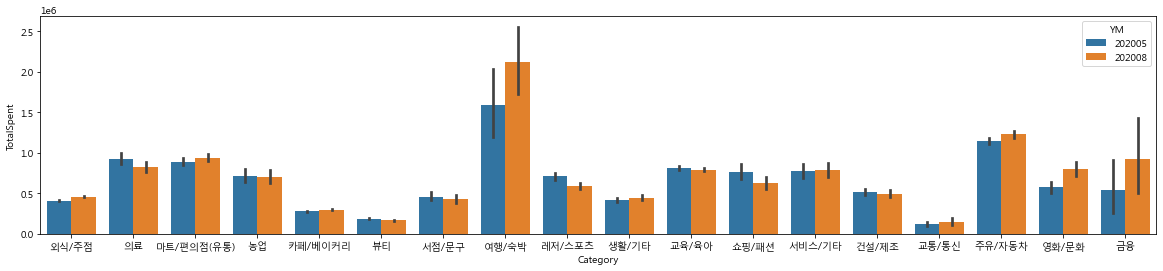

In [9]:
f, ax = plt.subplots(figsize=(20,4))
sns.barplot(x='Category', y ='TotalSpent', data=jeju_may_aug, hue='YM')

#### 2. 의료, 레저/스포츠, 교육/육아, 쇼핑/패션 분야가 재난지원금이 없는 8월 대비 높음 
#### 3. 재난지원금으로 소비 촉진이 일어난 업종일 것

# 4. 재난지원금 사용 분석 - 지역별 

1. 지역별-월별 총 사용금액 중 5월 사용이 많은 지역 > 재난지원금에 의한 사용 영향이 있을 것 
2. 5월 총 사용금액 > 8월 총 사용금액에 해당하는 지역을 분석 

##### 제주시 행정구역을 읍면동으로 구분하되 제주시의 시내동은 제주시로 통일함 
##### 서귀포시 행정구역을 읍면동으로 구분하되 서귀포시의 시내동은 서귀포시로 통일함 

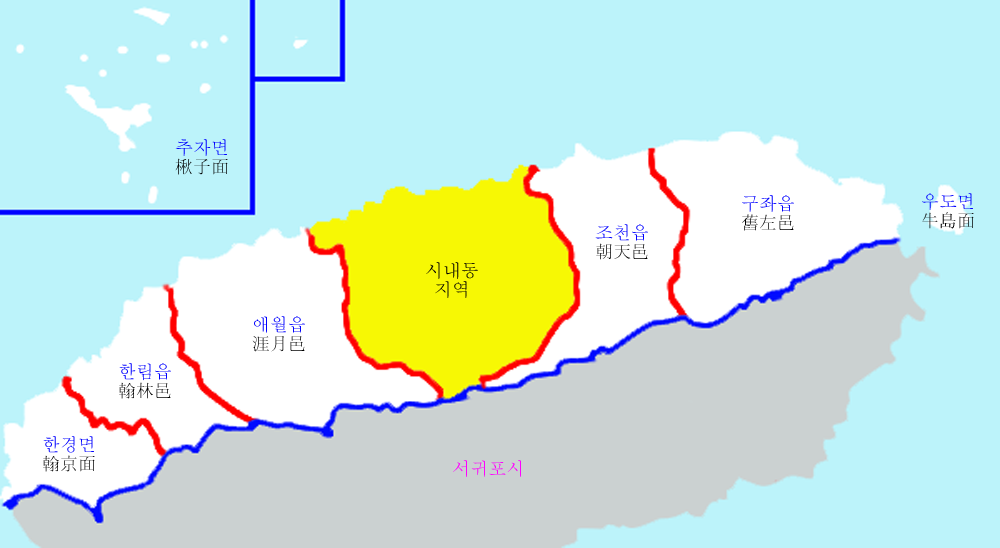

In [29]:
# 제주시 행정구역 이미지 (출처 : 위키백과)

from IPython.display import Image

Image('Jeju_city.png')

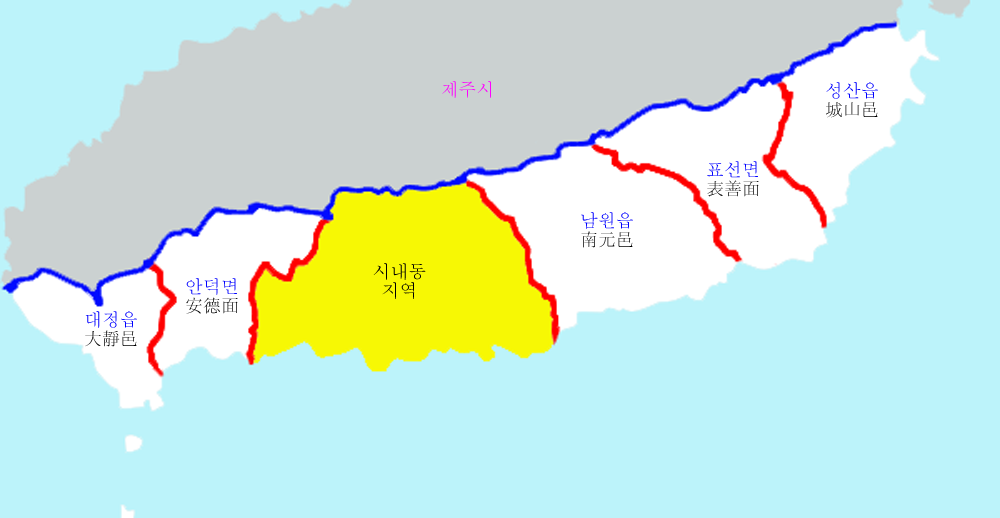

In [11]:
Image('Seogwipo_city.png')

In [27]:
# 제주시 --동 > 제주시로 통일
cond1 = jeju_all['SIGUNGU'] == '제주시'
cond2 = jeju_all['dong'].str.contains('동')
jeju_all['dong_cat'] = np.where(jeju_all['dong'].str.contains('동'),jeju_all['SIGUNGU'], jeju_all['dong'])

# 서귀포시 --동 > 서귀포시로 통일
cond1 = jeju_all['SIGUNGU'] == '서귀포시'
cond2 = jeju_all['dong'].str.contains('동')
jeju_all['dong_cat'] = np.where(jeju_all['dong'].str.contains('동'),jeju_all['SIGUNGU'], jeju_all['dong'])

jeju_all.tail(3)

,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,lon,lat,lon_lat,dong,Category,dong_cat
280082,278935,278935,202008,제주특별자치도,서귀포시,영세,예체능학원,x시,110000,0,1,0,921003.98200,1476177.84050,126.65174159048293,33.27407883370635,126.65174159048293_33.27407883370635,남원읍,교육/육아,남원읍
280083,279538,279538,202008,제주특별자치도,서귀포시,영세,기타가구,x시,50000,0,1,0,937500.16740,1486052.75280,126.82818252032293,33.36422597166203,126.82818252032293_33.36422597166203,성산읍,생활/기타,성산읍
280084,279785,279785,202008,제주특별자치도,제주시,영세,기타숙박업,x시,17470,0,2,0,941114.05310,1503713.22230,126.86586853032782,33.52371304945294,126.86586853032782_33.52371304945294,구좌읍,여행/숙박,구좌읍


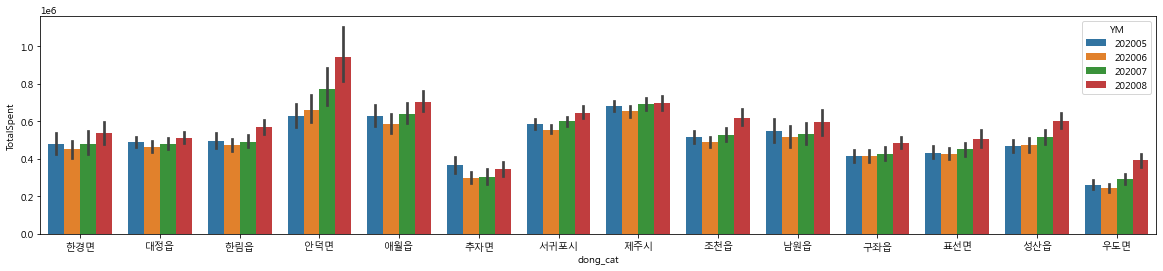

In [19]:
# 지역별-월별 총사용금액 
f, ax = plt.subplots(figsize=(20,4))
sns.barplot(x='dong_cat', y ='TotalSpent', data=jeju_all, hue='YM')

#### 총사용금액 5월 8월 비교 읍면동별 구분 
- 재난지원금이 20% 이상 차지하는 5월
- 재난지원금이 없었다면 8월 총사용금액에 비해 낮아야함 
- 재난지원금 사용으로 8월 총 사용금액과 비슷해진 지역의 경우, 재난지원금의 영향으로 소비가 촉진된 지역임 


#### 제주시와 추자면의 경우 5월과 8월의 사용금액이 거의 비슷함 
- 제주시 : 제주도 핵심 상권 지역으로 대부분의 상점, 편의시설 등이 몰려있음 
- 추자면 : 제주도 북부에 멀리 떨어진 도서 지역으로 물리적으로 재난지원금을 다른 지역에서 소비하기 어려웠을 것임 

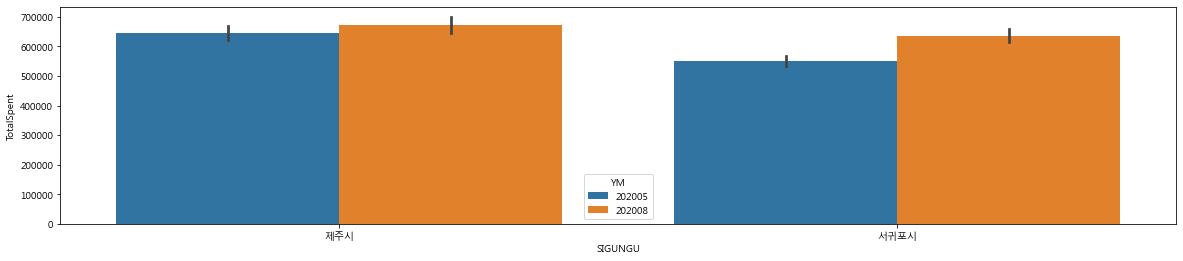

In [14]:
f, ax = plt.subplots(figsize=(20,4))
sns.barplot(x='SIGUNGU', y ='TotalSpent', data=jeju_may_aug, hue='YM')

#### 총사용금액 5월 8월 시별 구분 
- 제주시가 서귀포시에 비해 재난지원금의 상대적 효과가 큼  

# 5. 재난지원금 사용분석 - 업종규모별 

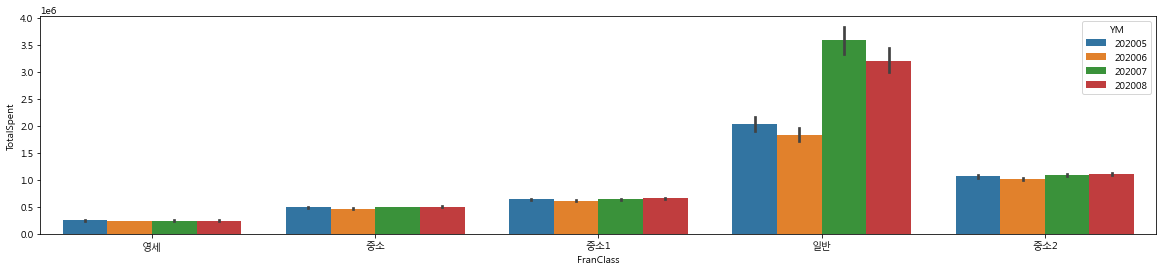

In [15]:
# 재난지원금 어느 상업규모에 도움이 되었는지 
f, ax = plt.subplots(figsize=(20,4))
sns.barplot(x='FranClass', y ='TotalSpent', data=jeju_all, hue='YM')

#### 일반 업종은 재난지원금 효과 낮음 그외 효과 있었음 
- 일반 업종의 대부분은 면세점, 골프장 등의 재난지원금 사용불가 업종이 많았음 

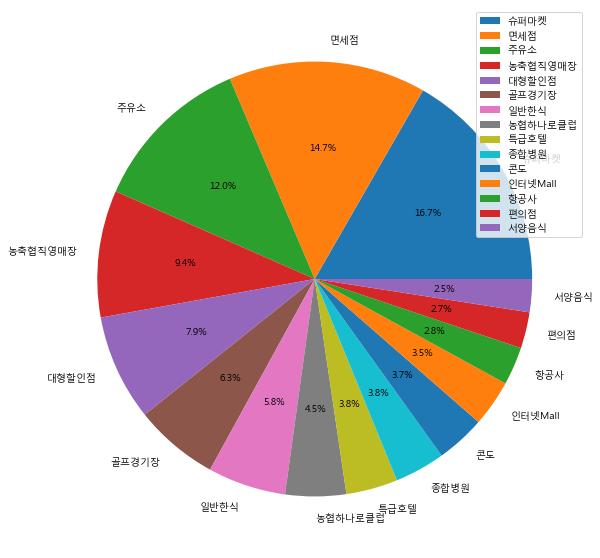

In [69]:
# 총 사용금액 중 일반 업종 규모에 해당하는 업종타입 확인 
plt.figure(figsize=(10,10))

jeju_class_norm = jeju_all[jeju_all['FranClass'] == '일반']
df_norm = jeju_class_norm.groupby('Type').sum()
df_norm = df_norm.sort_values(['TotalSpent'], ascending= [False]).head(15)

data = df_norm['TotalSpent'].values[:15]
cat = df_norm['TotalSpent'].index[:15]

plt.pie(data, labels=cat, autopct='%0.1f%%')
plt.legend(cat)

plt.show()

#### 재난지원금 사용불가 업종 : 
- 대형마트, 골프경기장, 면세점, (기업형)슈퍼마켓, 온라인전자 업종에서 사용 불가 
- 일반 업종규모의 경우 상위 대부분이 재난지원금 사용 불가 업종이었음 

# 결론 
- 재난지원금의 사용의 경우 특정 지역, 업종에 따라 사용이 되었음 
- 5월의 전체적인 소비를 촉진한 것은 맞지만 일부 지역과 업종에 한하여 촉진되어 전체적인 소비 촉진 정책으로 보기 어렵다 